In [59]:
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [60]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [61]:
data = pd.read_csv('13대_filtered1.csv')
data

,지역,민주정의당 노태우,통일민주당 김영삼,평화민주당 김대중,신민주공화당 김종필,한주의통일한국당 신종일
0,서울 종로구,46142,40485,51748,10604,134
1,서울 중구,35760,29805,42049,8834,117
2,서울 마포구,77074,77081,82814,19846,206
3,서울 용산구,56863,52208,57897,13609,158
4,서울 성동구,126415,115084,147525,34488,342
...,...,...,...,...,...,...
233,경남 함양군,19693,14633,971,1335,301
234,제주 제주시,45396,29864,20896,5649,202
235,제주 북제주군,31017,13559,7253,2039,198
236,제주 서귀포시,18578,10677,10320,2102,119


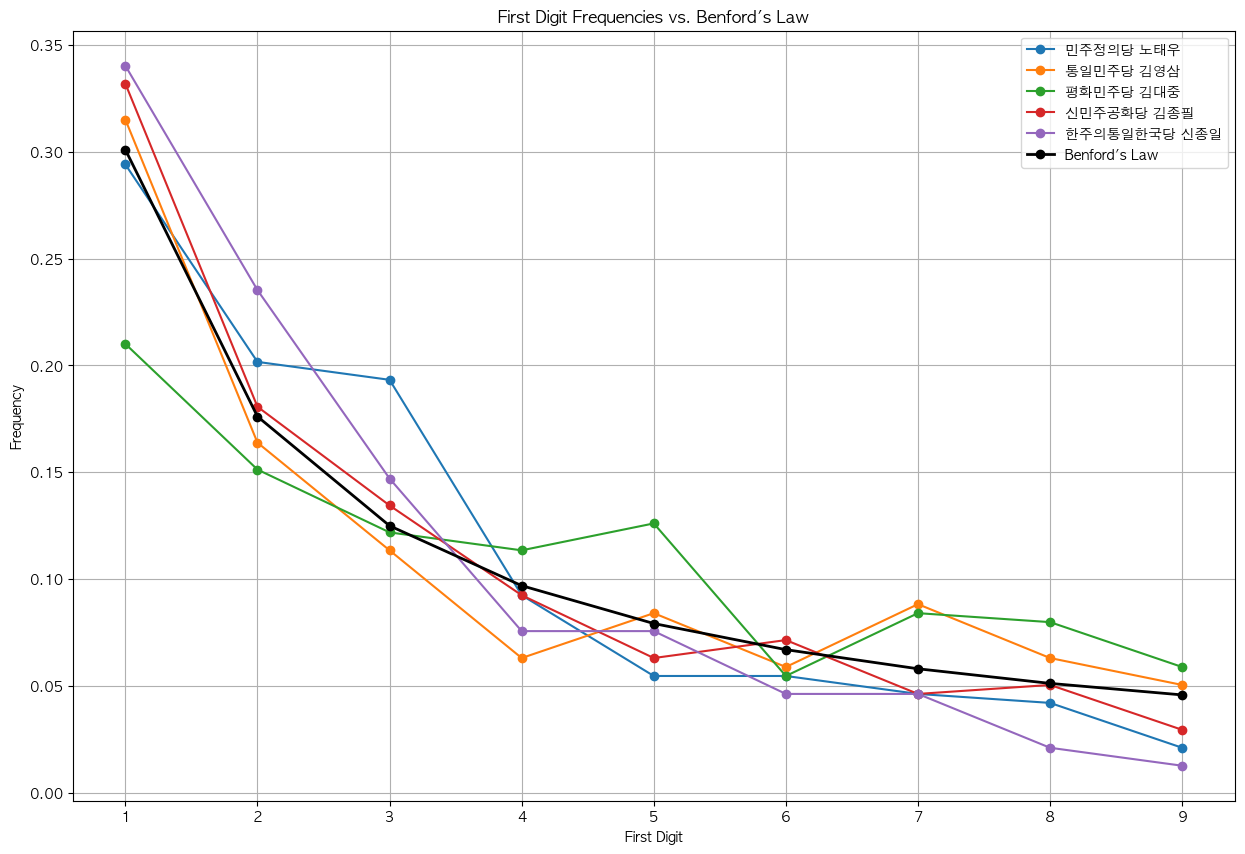

In [62]:
# Function to calculate the first digit frequency
def first_digit_frequencies(numbers):
    frequencies = np.zeros(9) # Array to hold frequencies for digits 1 through 9
    for number in numbers:
        if number > 0:
            first_digit = int(str(number)[0]) # Extract the first digit
            frequencies[first_digit - 1] += 1
    return frequencies / sum(frequencies) # Normalize the frequencies

# Calculate the Benford distribution
benford_distribution = [np.log10(1 + 1/d) for d in range(1, 10)]

# Initialize a figure for plotting
plt.figure(figsize=(15, 10))

# Plotting the first digit frequency for each candidate
for column in data.columns[1:]:
    frequencies = first_digit_frequencies(data[column])
    plt.plot(range(1, 10), frequencies, '-o', label=column)

# Plotting the Benford distribution for comparison
plt.plot(range(1, 10), benford_distribution, '-o', label='Benford\'s Law', color='black', linewidth=2)

# Adding labels and title to the plot
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('First Digit Frequencies vs. Benford\'s Law')
plt.legend()
plt.grid(True)
plt.show()


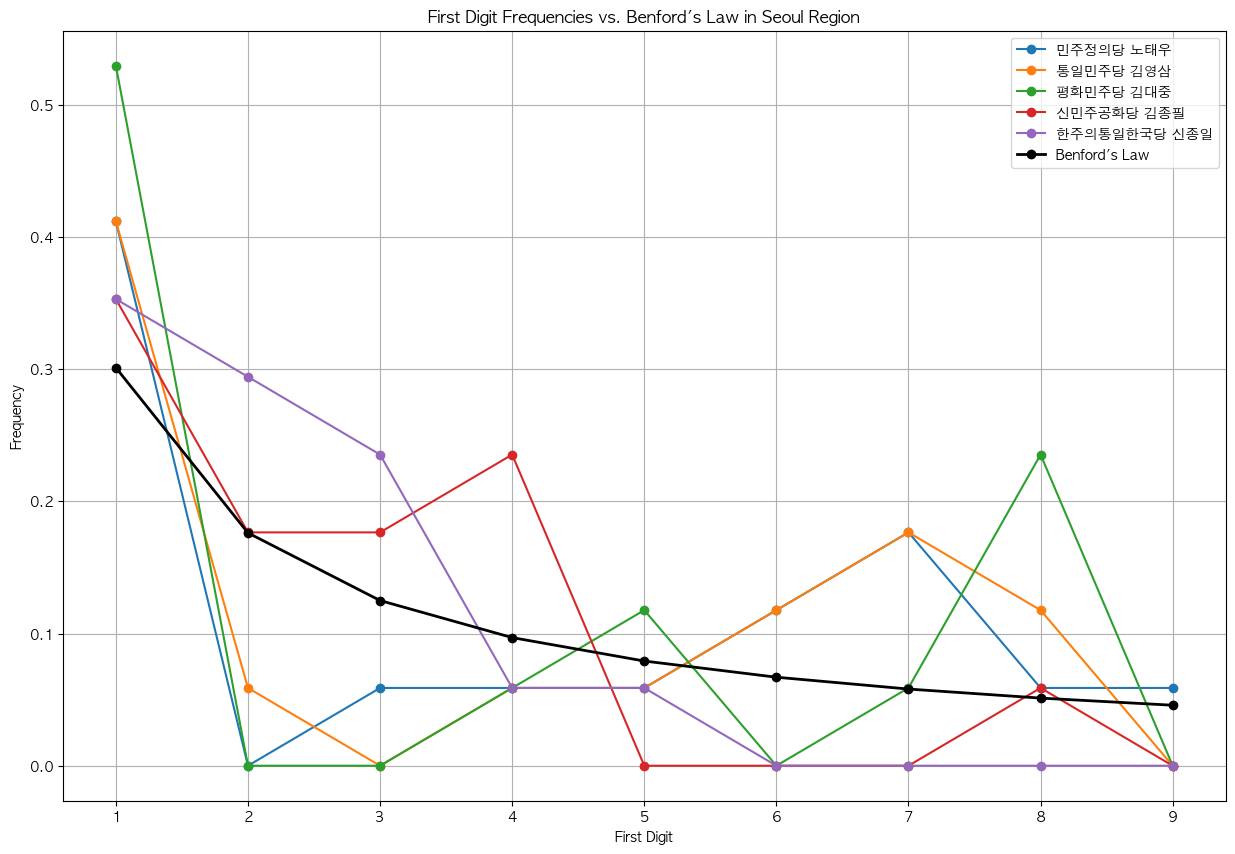

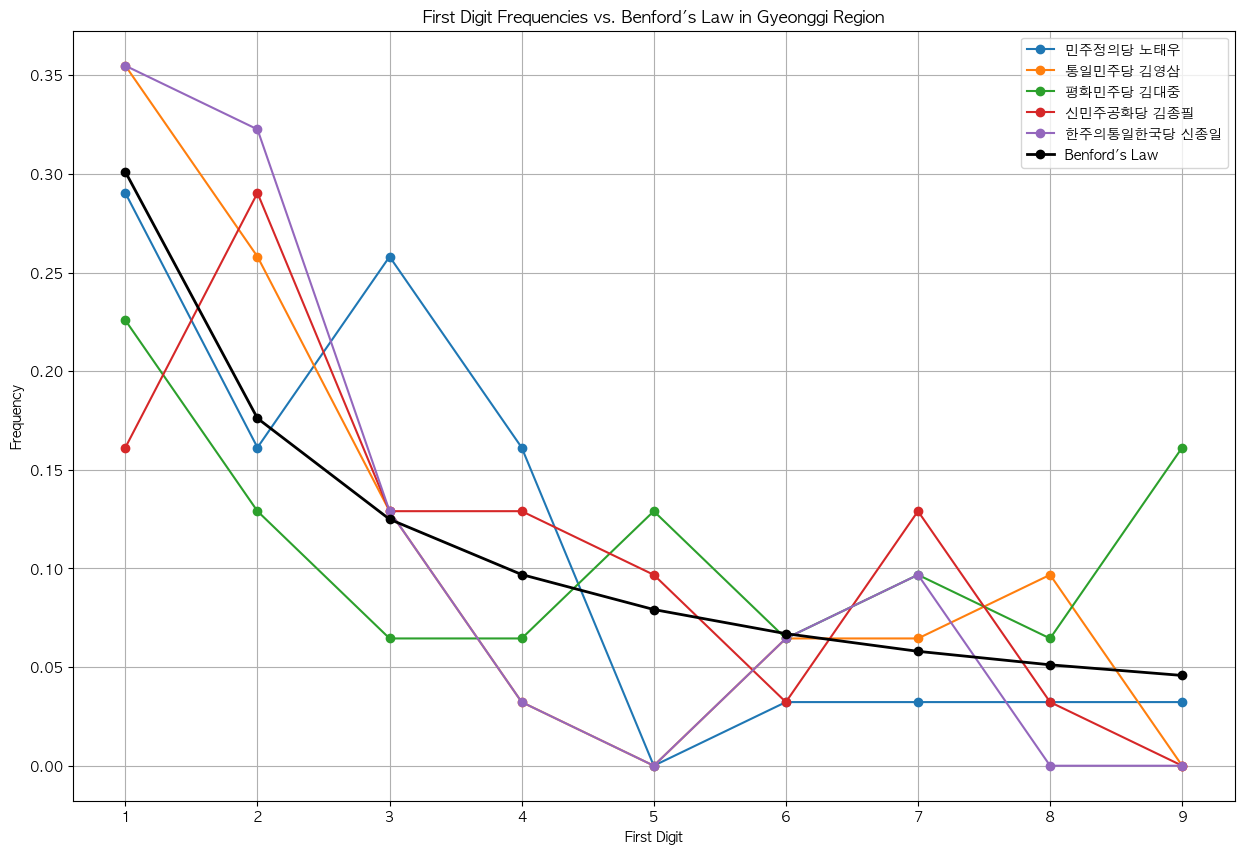

In [63]:
# Splitting the dataset into Seoul and Gyeonggi regions
seoul_data = data[data['지역'].str.startswith('서울')]
gyeonggi_data = data[data['지역'].str.startswith('경기')]

# Function to plot the first digit frequencies for a given dataset
def plot_first_digit_frequencies(dataset, region_name):
    plt.figure(figsize=(15, 10))

    # Plotting the first digit frequency for each candidate in the given dataset
    for column in dataset.columns[1:]:
        frequencies = first_digit_frequencies(dataset[column])
        plt.plot(range(1, 10), frequencies, '-o', label=column)

    # Plotting the Benford distribution for comparison
    plt.plot(range(1, 10), benford_distribution, '-o', label='Benford\'s Law', color='black', linewidth=2)

    # Adding labels and title to the plot
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title(f'First Digit Frequencies vs. Benford\'s Law in {region_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting for Seoul region
plot_first_digit_frequencies(seoul_data, 'Seoul Region')

# Plotting for Gyeonggi region
plot_first_digit_frequencies(gyeonggi_data, 'Gyeonggi Region')